In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [2]:
df_2007= pd.read_csv('2007.csv')
#df_2008=pd.read_csv('2008.csv')

In [4]:
df_2007.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')

In [3]:
df_2007070707007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
df_2007.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [5]:
df_2007.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7453215.0,7.453215e+06,7.453215e+06,7.453215e+06,7.292467e+06,7.453215e+06,7.275288e+06,7.453215e+06,7.453215e+06,7.275288e+06,...,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,2007.0,6.514876e+00,1.572589e+01,3.933804e+00,1.339221e+03,1.330596e+03,1.482105e+03,1.495392e+03,2.188099e+03,1.263223e+02,...,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,0.0,3.425117e+00,8.781154e+00,1.992267e+00,4.798528e+02,4.647080e+02,5.072241e+02,4.815902e+02,1.971958e+03,7.118009e+01,...,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,2007.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007.0,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.107000e+03,1.115000e+03,5.900000e+02,7.600000e+01,...,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.0,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.322000e+03,1.513000e+03,1.520000e+03,1.509000e+03,1.080000e+02,...,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2007.0,9.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.553000e+03,1.560000e+02,...,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2007.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.602000e+03,1.270000e+03,...,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [7]:
df_2007.shape

(7453215, 29)

In [165]:
filename = "2007.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(xrange(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df2007 = pd.read_csv(filename, skiprows=skip)

In [166]:
filename = "2008.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(xrange(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df2008 = pd.read_csv(filename, skiprows=skip)

In [167]:
df2007.shape , df2008.shape

((100000, 29), (100000, 29))

In [168]:
df= pd.concat([df2007,df2008],axis=0)

In [169]:
df.shape

(200000, 29)

In [170]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1638.0,1640,1749.0,1755,WN,2299,...,4.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1447.0,1435,1504.0,1505,WN,165,...,6.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,2,2,1000.0,1000,1402.0,1405,WN,1359,...,8.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2007,1,2,2,953.0,955,1036.0,1050,WN,906,...,2.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2007,1,2,2,629.0,630,726.0,720,WN,2283,...,3.0,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [171]:
df.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')

In [172]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.000000,200000.000000,200000.000000,200000.000000,195844.000000,200000.000000,195397.000000,200000.000000,200000.000000,195349.000000,...,200000.00000,197741.000000,197969.000000,200000.000000,200000.000000,121678.000000,121678.000000,121678.000000,121678.000000,121678.000000
mean,2007.500000,6.439295,15.750050,3.923730,1337.227548,1329.318010,1482.345752,1496.093760,2209.002625,126.854399,...,722.88374,6.774872,16.390172,0.020890,0.002365,5.999269,1.181504,6.164985,0.029833,7.880874
std,0.500001,3.416030,8.791503,1.991811,478.652103,464.279128,506.270076,482.143813,1972.309941,70.474125,...,560.75605,5.025701,11.588986,0.143016,0.048574,26.057501,12.235605,20.352175,1.004145,25.954718
min,2007.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,...,11.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3.000000,8.000000,2.000000,929.000000,930.000000,1107.000000,1115.000000,605.000000,76.000000,...,324.00000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,6.000000,16.000000,4.000000,1328.000000,1322.000000,1513.000000,1520.000000,1540.000000,109.000000,...,576.00000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,9.000000,23.000000,6.000000,1730.000000,1720.000000,1910.000000,1907.000000,3549.000000,157.000000,...,948.00000,8.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2008.000000,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9601.000000,686.000000,...,4962.00000,199.000000,383.000000,1.000000,1.000000,1072.000000,893.000000,655.000000,135.000000,546.000000


In [173]:
df.columns[df.isnull().any()]

Index([u'DepTime', u'ArrTime', u'TailNum', u'ActualElapsedTime',
       u'CRSElapsedTime', u'AirTime', u'ArrDelay', u'DepDelay', u'TaxiIn',
       u'TaxiOut', u'CancellationCode', u'CarrierDelay', u'WeatherDelay',
       u'NASDelay', u'SecurityDelay', u'LateAircraftDelay'],
      dtype='object')

In [174]:
missing_values_cols=df.isnull().sum()/df.shape[0] 
missing_values_cols = missing_values_cols[missing_values_cols>0]
missing_values_cols.sort_values(inplace=True,ascending=False)
missing_values_cols

CancellationCode     0.979110
LateAircraftDelay    0.391610
SecurityDelay        0.391610
NASDelay             0.391610
WeatherDelay         0.391610
CarrierDelay         0.391610
ArrDelay             0.023255
AirTime              0.023255
ActualElapsedTime    0.023255
ArrTime              0.023015
DepDelay             0.020780
DepTime              0.020780
TaxiIn               0.011295
TaxiOut              0.010155
TailNum              0.006095
CRSElapsedTime       0.000160
dtype: float64

CancellationCode is missing for 97% of data

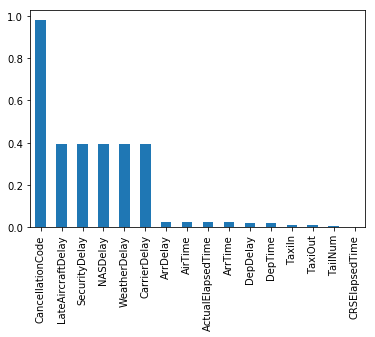

In [175]:
missing_values_cols.plot(kind='bar')
plt.show()

** Model Hypothesis **

Our "target" variable will be DepDelay (scheduled departure delay in minutes). To build a classifier, we further refine our target variable into a binary variable by defining a "delay" as having 15 mins or more of delay, and "non-delay" otherwise. We thus create a new binary variable that we name 'DepDelayed'.

In [176]:
def gen_class(inp):
    if inp>15:
        return 1
    else:
        return 0

In [177]:
df['label'] = df['DepDelay'].apply(gen_class)

In [178]:
df[['DepDelay','label']].head()

,DepDelay,label
0,-2.0,0
1,12.0,0
2,0.0,0
3,-2.0,0
4,-1.0,0


In [179]:
df.label.value_counts()/df.shape[0]*100

0    80.781
1    19.219
Name: label, dtype: float64

As per sample data , 20% of the flights get delayed 

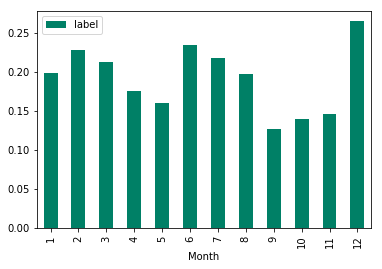

In [180]:
# Select a Pandas dataframe with flight originating from ORD


# Compute average number of delayed flights per month
grouped = df[['label', 'Month']].groupby('Month').mean()

# plot average delays by month
grouped.plot(kind='bar',colormap=plt.get_cmap('summer'))
plt.show()

We see that the average number of delays is highest in December and February, which is what we would expect.

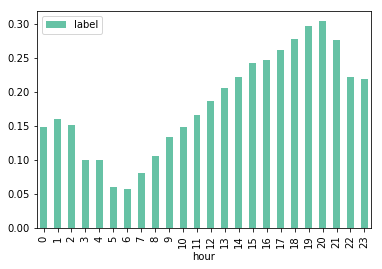

In [181]:
# Compute average number of delayed flights by hour
df['hour'] = df['CRSDepTime'].map(lambda x: int(str(int(x)).zfill(4)[:2]))
grouped = df[['label', 'hour']].groupby('hour').mean()

# plot average delays by hour of day
grouped.plot(kind='bar',colormap=plt.get_cmap('Set2'))
plt.show()

A clear pattern here - flights tend to be delayed later in the day. Perhaps this is because delays tend to pile up as the day progresses and the problem tends to compound later in the day

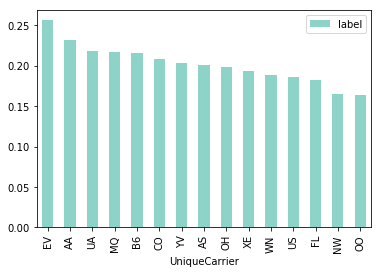

In [182]:
# Compute average number of delayed flights per carrier
grouped1 = df[['label', 'UniqueCarrier']].groupby('UniqueCarrier').filter(lambda x: len(x)>10)
grouped2 = grouped1.groupby('UniqueCarrier').mean()
carrier = grouped2.sort_values(['label'], ascending=False)

# display top 15 destination carriers by delay (from ORD)
carrier[:15].plot(kind='bar',colormap=plt.get_cmap('Set3'))
plt.show()

Few airlines are better than others

In [183]:
numeric_data = df[['Month','DayofMonth','DayOfWeek','hour','UniqueCarrier','Dest','Distance']].select_dtypes(include=[np.number])
cat_data = df[['Month','DayofMonth','DayOfWeek','hour','UniqueCarrier','Dest','Distance']].select_dtypes(exclude=[np.number])

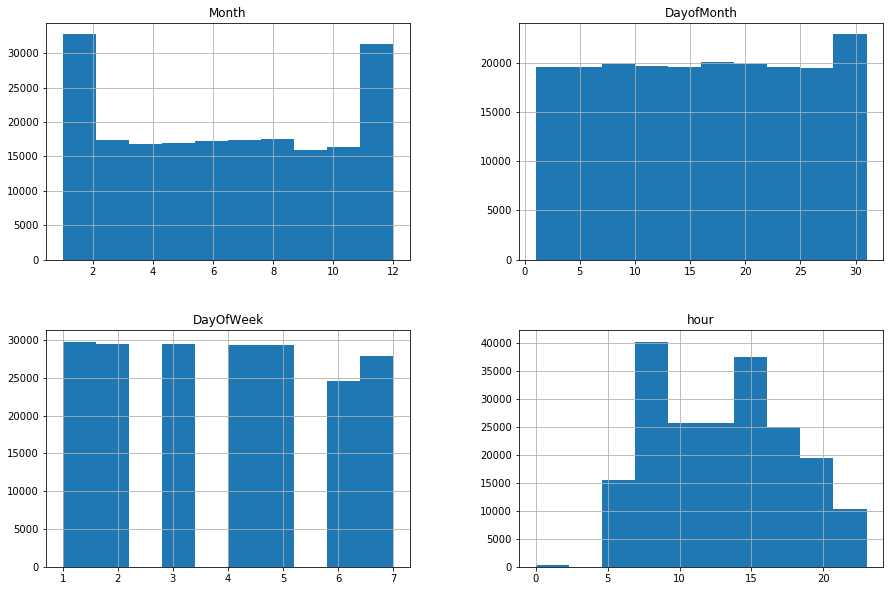

In [184]:
fig,axes = plt.subplots(2,2,figsize=(15,10))

i=0
for l in axes:
    for rec in l:
        
        numeric_data.hist(column=numeric_data.columns[i],bins=10,ax=rec)
        if i>5:
            break
        i+=1

** Pre Processing **

**Feature Hypothesis**

**month**: winter months should have more delays than summer months 
<br>
**day of month**: this is likely not a very predictive variable, but let's keep it in anyway
<br>
**day of week**: weekend vs. weekday
<br>
**hour of the day**: later hours tend to have more delays
<br>
**Carrier**: we might expect some carriers to be more prone to delays than others
<br>
**Destination airport**: we expect some airports to be more prone to delays than others
<br>
**Distance**: interesting to see if this variable is a good predictor of delay


In [185]:
df.columns

Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay', u'label', u'hour'],
      dtype='object')

In [198]:
X = df[['Month','DayofMonth','DayOfWeek','hour','UniqueCarrier','Dest','Distance']]
y= df['label']

In [199]:
X.shape,y.shape

((200000, 7), (200000,))

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 ,random_state=0)

In [189]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140000, 7), (60000, 7), (140000, 1), (60000, 1))

## Label Encoding & One Hot Encoding 

In [190]:
le=LabelEncoder()
#data=pd.DataFrame()

In [191]:
for col in X_test.columns.values:
       # Encoding only categorical variables
        if X_test[col].dtypes=='object':
            #print col
            data=X_train[col].append(X_test[col])
            le.fit(data.values)
            X_train[col]=le.transform(X_train[col])
            X_test[col]=le.transform(X_test[col])

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [192]:
X_train.head()

,Month,DayofMonth,DayOfWeek,hour,UniqueCarrier,Dest,Distance
32759,4,12,4,13,6,277,445
28335,4,14,6,12,16,223,992
36594,5,2,3,12,16,64,544
60228,7,19,6,21,6,80,547
32979,4,23,3,10,1,261,337


In [193]:
enc=OneHotEncoder(sparse=False)

In [194]:
X_train_1=X_train
X_test_1=X_test
cols=['UniqueCarrier','Dest']
for col in cols:
    data=X_train[[col]].append(X_test[[col]])
    enc.fit(data)
    temp = enc.transform(X_train[[col]])
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    temp=temp.set_index(X_train.index.values)
    X_train_1=pd.concat([X_train_1,temp],axis=1)
    temp = enc.transform(X_test[[col]])
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
    temp=temp.set_index(X_test.index.values)
    X_test_1=pd.concat([X_test_1,temp],axis=1)

In [195]:
X_train_1.head()

,Month,DayofMonth,DayOfWeek,hour,UniqueCarrier,Dest,Distance,UniqueCarrier_17,UniqueCarrier_1,UniqueCarrier_14,...,Dest_33,Dest_8,Dest_174,Dest_136,Dest_274,Dest_84,Dest_89,Dest_146,Dest_124,Dest_148
32759,4,12,4,13,6,277,445,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28335,4,14,6,12,16,223,992,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36594,5,2,3,12,16,64,544,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60228,7,19,6,21,6,80,547,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32979,4,23,3,10,1,261,337,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
stdX = StandardScaler()
X_train_1= stdX.fit_transform(X_train_1)
X_test_1 = stdX.transform(X_test_1)

## Logistic Regression Model

In [153]:
clf1 = LogisticRegression()
clf1.fit(X_train_1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
y_pred = clf1.predict(X_test_1)

In [158]:
print "Accuracy:", accuracy_score(y_test,y_pred)
print classification_report(y_test,y_pred)

Accuracy: 0.806516666667
             precision    recall  f1-score   support

          0       0.81      1.00      0.89     48458
          1       0.31      0.00      0.01     11542

avg / total       0.71      0.81      0.72     60000



In [159]:
confusion_matrix(y_test,y_pred)

array([[48335,   123],
       [11486,    56]])

** Accuracy :** 80%
<br>
** Precision: ** 71%
<br>
** Recall : ** 81%
<br>
** F1-Score: ** 72

## Random Forest Model

In [197]:
rfClf = RandomForestClassifier(n_estimators=500)
rfClf.fit(X_train_1,y_train)

/Users/rishabh/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [201]:
y_pred = rfClf.predict(X_test_1)

In [202]:
print "Accuracy:", accuracy_score(y_test,y_pred)
print classification_report(y_test,y_pred)

Accuracy: 0.805733333333
             precision    recall  f1-score   support

          0       0.82      0.98      0.89     48660
          1       0.42      0.08      0.13     11340

avg / total       0.74      0.81      0.75     60000



In [203]:
confusion_matrix(y_test,y_pred)

array([[47474,  1186],
       [10470,   870]])

** Logistic Regression ** seems to do pretty decent job with 80% Accuracy